<a href="https://colab.research.google.com/github/jithesh9539/Credit_Card_Final_Test/blob/main/Testing_Credit_Card.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing the Dependencies**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import itertools
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score 
from sklearn.preprocessing import StandardScaler
import imblearn
from collections import Counter

**Loading Dataset to Pandas DataFrame**

In [2]:
credit_data=pd.read_csv('/content/creditcard.csv')

**Below command provides the information of the dataset and could observe that there are no null values in any of the columns(Features)**

In [3]:
credit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
credit_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [5]:
credit_data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [6]:
Fraud_Transaction=credit_data[credit_data.Class==1]
Non_Fraud_Transaction=credit_data[credit_data.Class==0]
print ("Number of Fraud Transactions in the Dataset is:",Fraud_Transaction.shape[0])
print ("Number of Non Fraud Transactions in the Dataset is:",Non_Fraud_Transaction.shape[0])

Number of Fraud Transactions in the Dataset is: 492
Number of Non Fraud Transactions in the Dataset is: 284315


**Scaling the amount to be in the range between [-1,1]**

In [7]:
std_scaler=StandardScaler()
credit_data['Amount'] = std_scaler.fit_transform(credit_data['Amount'].values.reshape(-1,1))

In [8]:
X = credit_data.drop(columns = ['Class','Time'])
y = credit_data['Class']

**Splitting the data into train and test dataset (70% Training Dataset,30% Test Dataset)**

In [9]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,stratify=y,random_state=42)

In [10]:
X_train.shape

(199364, 29)

In [11]:
X_test.shape

(85443, 29)

**Created a function to transform the data by using Smotek Technique**

In [12]:
def transform(transformer,X,y):
    print("Transforming {}".format(transformer.__class__.__name__))
    X_resampled,y_resampled = transformer.fit_resample(X.values,y.values.ravel())
    return transformer.__class__.__name__,pd.DataFrame(X_resampled), pd.DataFrame(y_resampled)

In [13]:
set=[]
set.append(transform(imblearn.combine.SMOTETomek(),X_train,y_train))

Transforming SMOTETomek


**Modelling Using Decision Tree, KNN and XG Boost**

In [14]:
# 1. Decision Tree

tree_model = DecisionTreeClassifier(max_depth = 4, criterion = 'entropy')
tree_model.fit(X_train, y_train)
tree_yhat = tree_model.predict(X_test)


In [15]:
# 2. KNN (K-Nearest Neighbors)

knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)
knn_yhat = knn.predict(X_test)


In [16]:
# 3. XGBoost

xgb = XGBClassifier(max_depth = 4)
xgb.fit(X_train, y_train)
xgb_yhat = xgb.predict(X_test)

In [17]:
print('F1 score of the Decision Tree model is {}'.format(f1_score(y_test, tree_yhat)))
print('F1 score of the KNN model is {}'.format(f1_score(y_test, knn_yhat)))

print('F1 score of the XGBoost model is {}'.format(f1_score(y_test, xgb_yhat)))

F1 score of the Decision Tree model is 0.7956989247311828
F1 score of the KNN model is 0.8134328358208955
F1 score of the XGBoost model is 0.8455882352941175


In [18]:
def plot_confusion_matrix(cm, classes, title, normalize = False, cmap = plt.cm.Blues):
    title = 'Confusion Matrix of {}'.format(title)
    if normalize:
        cm = cm.astype(float) / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment = 'center',
                 color = 'white' if cm[i, j] > thresh else 'black')

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [19]:
# Compute confusion matrix for the models
tree_matrix = confusion_matrix(y_test, tree_yhat, labels = [0, 1]) # Decision Tree
knn_matrix = confusion_matrix(y_test, knn_yhat, labels = [0, 1]) # K-Nearest Neighbors
xgb_matrix = confusion_matrix(y_test, xgb_yhat, labels = [0, 1]) # XGBoost

In [20]:
# Plot the confusion matrix

plt.rcParams['figure.figsize'] = (8, 8)

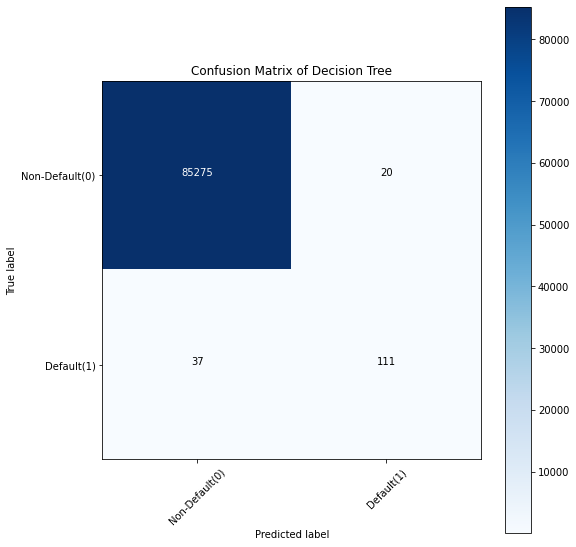

In [21]:
# 1. Decision tree

tree_cm_plot = plot_confusion_matrix(tree_matrix, 
                                classes = ['Non-Default(0)','Default(1)'], 
                                normalize = False, title = 'Decision Tree')
plt.savefig('tree_cm_plot.png')
plt.show()

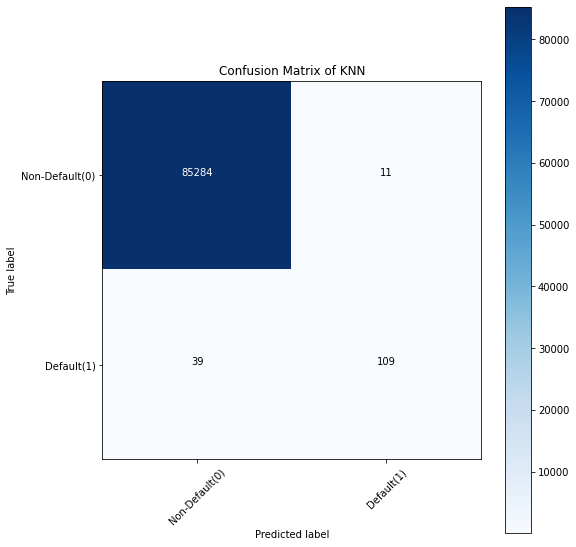

In [22]:
# 2. K-Nearest Neighbors

knn_cm_plot = plot_confusion_matrix(knn_matrix, 
                                classes = ['Non-Default(0)','Default(1)'], 
                                normalize = False, title = 'KNN')
plt.savefig('knn_cm_plot.png')
plt.show()

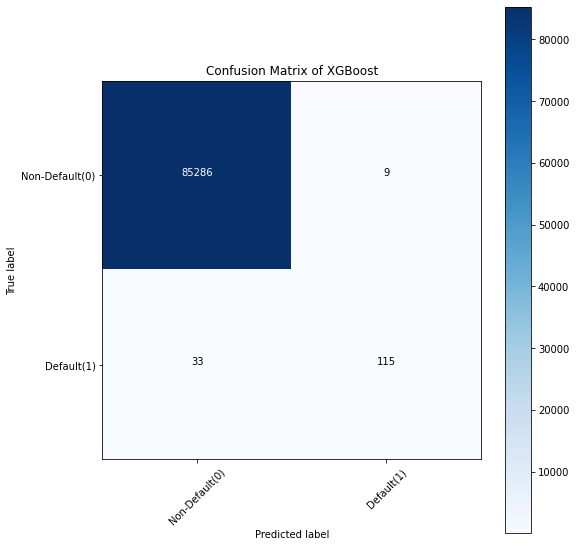

In [23]:
#3 XGBoost

xgb_cm_plot = plot_confusion_matrix(xgb_matrix, 
                                classes = ['Non-Default(0)','Default(1)'], 
                                normalize = False, title = 'XGBoost')
plt.savefig('xgb_cm_plot.png')
plt.show()

In [24]:
import pickle
pickle.dump(xgb, open('xgg_model.pkl','wb'))
pickle.dump(knn, open('knn_model.pkl','wb'))
pickle.dump(tree_model, open('tree_model.pkl','wb'))